Cleaning data: Lending Club
=========
***


The [Lending Club](http://www.lendingclub.com) is a peer-to-peer lending site where members make loans to each other.
The site makes anonymized data on loans and borrowers publicly available.  We're going to use these data to explore how the interest rate charged on loans depends on various factors.


1. Browse the data  
2. Data cleanup  
3. Visual exploration  


## I. Browse Data
		 	 	
The data have the following variables (with data type and explanation of meaning)
			
* __Amount.Requested__ - _numeric_. The amount (in dollars) requested in the loan application.  		
  
* __Amount.Funded.By.Investors__ - _numeric_.  The amount (in dollars) loaned to the individual.  

* __Interest.rate__ – character. The lending interest rate charged to the borrower.  

* __Loan.length__ - character. The length of time (in months) of the loan.    			

* __Loan.Purpose__ – categorical variable. The purpose of the loan as stated by the applicant.   

* __Debt.to.Income.Ratio__ – character  The % of consumer’s gross income going toward paying debts.   

* __State__ - character. The abbreviation for the U.S. state of residence of the loan applicant.   

* __Home.ownership__ - character. Indicates whether the applicant owns, rents, or has a mortgage.   

* __Monthly.income__ -­ categorical. The monthly income of the applicant (in dollars).  

* __FICO.range__  – categorical (expressed as a string label e.g. “650-655”). A range indicating the applicants FICO score. 	

* __Open.CREDIT.Lines__ - numeric. The number of open lines of credit at the time of application.  

* __Revolving.CREDIT.Balance__ - numeric. The total amount outstanding all lines of credit.   			

* __Inquiries.in.the.Last.6.Months__ - numeric. Number of credit inquiries in the previous 6 months.  

* __Employment.Length__ - character.  Length of time employed at current job.  
		

## II. Data Cleanup 

We find the data are "messy" i.e aren't cleanly prepared for import - for instance numeric columns might have some strings in them.  This is very common in raw data especially that obtained from web sites.

Let's take a look. we're going to look at the first five rows of some specific columns that show the data dirtiness issues.

In [47]:
%matplotlib inline
# first we ingest the data from the source on the web
# this contains a reduced version of the data set from Lending Club
import pandas as pd
loansData = pd.read_csv('https://spark-public.s3.amazonaws.com/dataanalysis/loansData.csv')

In [48]:
loansData['Interest.Rate'][0:5] # first five rows of Interest.Rate

81174     8.90%
99592    12.12%
80059    21.98%
15825     9.99%
33182    11.71%
Name: Interest.Rate, dtype: object

In [49]:
loansData['Loan.Length'][0:5] # first five rows of Loan.Length

81174    36 months
99592    36 months
80059    60 months
15825    36 months
33182    36 months
Name: Loan.Length, dtype: object

We see here that:

* the interest rate information has "%" symbols in it.
* loan length has " months" in it

Other than that we can also see (exploration exercise):

* there are a couple of values that are so large they must be typos
* some values are missing "NA" values i.e. not available.
* the FICO Range is really a numeric entity but is represented as a categorical variable in the data.

In [50]:
loansData['FICO.Range'][0:5] # first five rows of FICO.Range

81174    735-739
99592    715-719
80059    690-694
15825    695-699
33182    695-699
Name: FICO.Range, dtype: object

FICO Range is represented as a categorical variable in the data.

We need to change the categorical variable for FICO Range into something numeric so that we can use it in our calculations.  As it stands, the values are merely labels, and while they convey meaning to humans, our software can't interpret them as the numbers they really represent.

So as a first step, we convert them from categorical variables to strings.  So the abstract entity 735-739 becomes a string "735-739".
Then we parse the strings so that a range such as "735-739" gets split into two numbers (735,739).

Finally we pick a single number to represent this range. We could choose a midpoint but since the ranges are narrow we can get away with choosing one of the endpoints as a representative. Here we arbitrarily pick the lower limit and with some imperious hand waving, assert that it is not going to make a major difference to the outcome.

In a further flourish of imperiousness we could declare that "the proof is left as an exercise to the reader". But in reality there is really no such formal "proof" other than trying it out in different ways and convincing oneself.  If we wanted to be mathematically conservative we could take the midpoint of the range as a representative and this would satisfy most pointy-haired mathematician bosses that "Data Science Dilbert" might encounter.


To summarize - cleaning our data involves:

* removing % signs from rates
* removing the word ” months" from loan length.
* managing outliers - remove such rows in this case
* managing NA - remove such rows in this case

There is one especially high outlier with monthly income > 100K$+.  
This is likely to be a typo and is removed as a data item.  
There is also one data item with all N/A - this is also removed.  

In [53]:
loansData['Interest.Rate'] = loansData['Interest.Rate'].map(lambda x: x.rstrip('%'))
loansData['Interest.Rate'][0:5]

81174     8.90
99592    12.12
80059    21.98
15825     9.99
33182    11.71
Name: Interest.Rate, dtype: object

In [54]:
loansData['Loan.Length'] = loansData['Loan.Length'].map(lambda x: x.rstrip(' months'))
loansData['Loan.Length'][0:5]

81174    36
99592    36
80059    60
15825    36
33182    36
Name: Loan.Length, dtype: object

In [55]:
loansData['Loan.Length'].irow(5)

'36'

##Exercise
Actually perform each of the above steps on the dataset i.e.

* import the data
* remove the '%' suffix from each row
* remove the ' months' suffix from each row
* remove the outlier rows
* remove rows with NA

Save your code in a reusable manner - these are steps you'll be doing repeatedly.


##Visual Exploration  

Now we are going to follow a standard set of steps in exploring data.  We apply the following simple visualizations. This is something we will typically also do for other data sets we encounter in other explorations.  

###Histogram

A histogram shows us the shape of the distribution of values for a **single** variable.
On the x-axis we have the variable under question, divided into buckets or bins.  This is a key feature of a histogram.

The bin size is adjustable and different bin sizes give different information.  A large bin size gives us an idea of the coarser grained structure of the distribution while a smaller bin size will shine light on the finer details of the distribution.  In either case we can compare distributions, or quickly identify some key hints that tell use how best to proceed.

With the distribution of FICO scores we see the histogram below.

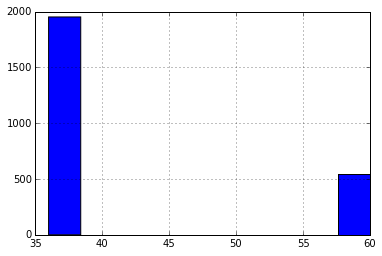

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
plt.figure()
#loansmin = pd.read_csv('../datasets/loanf.csv')
LL = loansData['Loan.Length']
LLC = LL.dropna()
LLCF = LLC.astype(float)
p = LLCF.hist()

In [58]:
loansData['FICO'] = loansData['FICO.Range'].map(lambda x: x.split('-')[1])
loansData['FICO'][0:5]

81174    739
99592    719
80059    694
15825    699
33182    699
Name: FICO, dtype: object

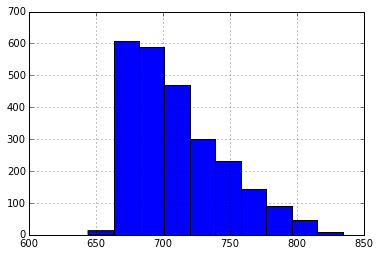

In [59]:
FS = loansData['FICO']
FSC = FS.dropna()
FSCF = FSC.astype(float)
p = FSCF.hist()